In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import ppscore as pps

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")
pd.options.plotting.backend = "plotly"

data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [2]:
data.columns 

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
# ->About 6.5 million adults in the United States have heart failure.
# ->Heart failure was a contributing cause of 1 in 8 deaths in 2017.
# ->Heart failure costs the nation an estimated $30.7 billion in 2012. 
# This total includes the cost of health care services, medicines to treat heart failure, and missed days of work.Source

In [6]:
# Description of Data
# Unique Value Count
fig = data.nunique().reset_index().plot(kind='bar', x='index', y=0, color=0)
fig.update_layout(title='Unique Value Count Plot', xaxis_title='Variables', yaxis_title='Unique value count')
fig.show()

In [7]:
# Missing Vlaue Plot
fig = data.isnull().sum().reset_index().plot(kind='bar', x='index', y=0)
fig.update_layout(title='Missing Value Plot', xaxis_title='Variables', yaxis_title='Missing value count')
fig.show()

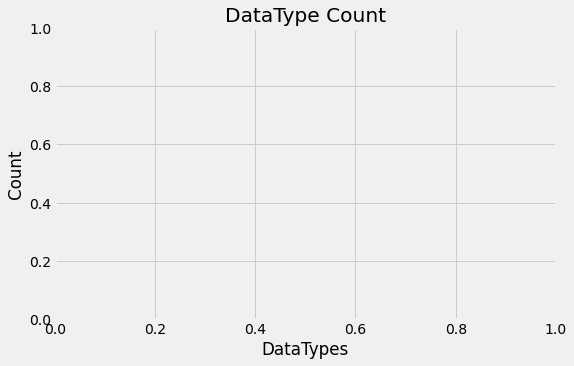

In [9]:
# DataType Count
df = data.dtypes.value_counts().reset_index()
df['index'] = df['index'].astype('str')
# sns.barplot(df['index'], df[0])
plt.title('DataType Count')
plt.xlabel('DataTypes')
plt.ylabel('Count')
plt.show()

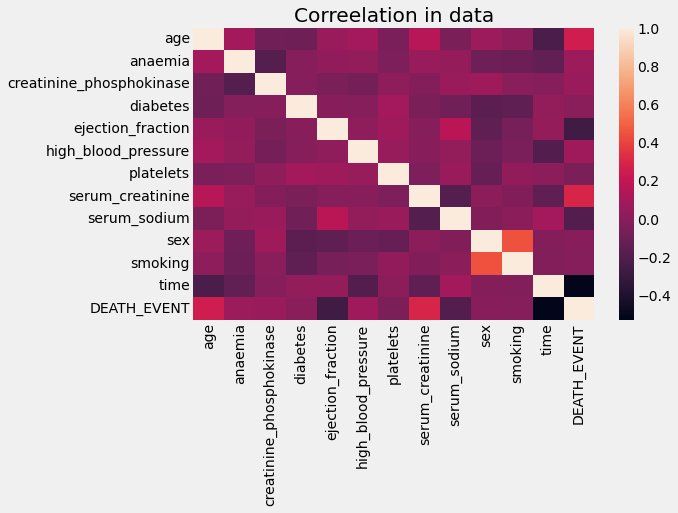

In [14]:
# Correelation In Data
sns.heatmap(data.corr())
plt.title('Correelation in data')
plt.show()

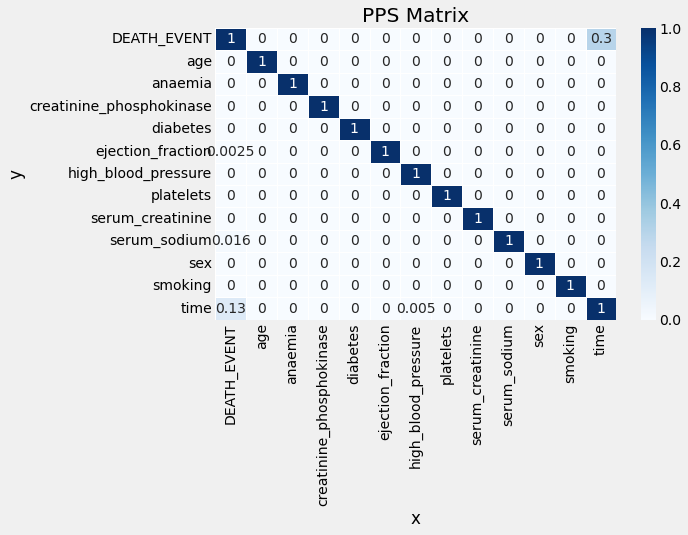

In [10]:
# Correelation Matrix
matrix_df = pps.matrix(data)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.title('PPS Matrix')
plt.show()

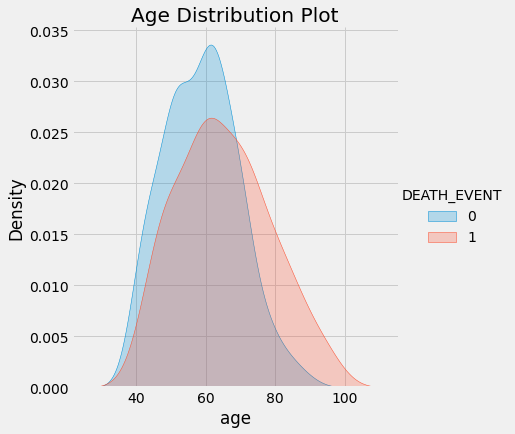

In [11]:
sns.FacetGrid(data, hue="DEATH_EVENT", height=6,).map(sns.kdeplot, "age",shade=True).add_legend()
plt.title('Age Distribution Plot')
plt.show()

In [12]:
px.box(data, x='DEATH_EVENT', y='creatinine_phosphokinase', color='smoking', title='Creatinine Phosphokinase Distribution')

In [13]:
px.violin(data, x='ejection_fraction', color='DEATH_EVENT', title='Ejection Fraction Distribution')

In [14]:
px.box(data, x='DEATH_EVENT', y='platelets', color='diabetes', points='all', title='Platelets Distribution')

In [15]:
px.box(data, x='DEATH_EVENT', y='time', color='smoking', notched=True, title='Time under observation Distribution')

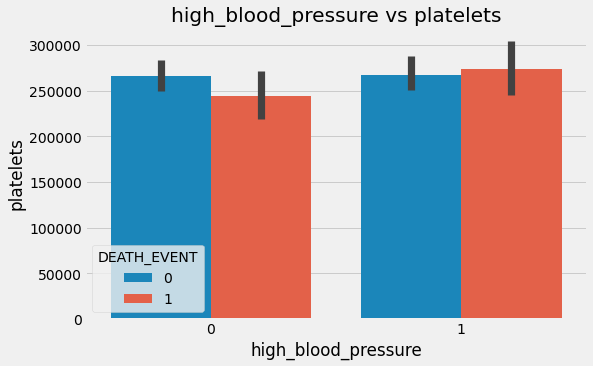

In [16]:
sns.barplot(data=data, x='high_blood_pressure', y='platelets', hue='DEATH_EVENT')
plt.title('high_blood_pressure vs platelets')
plt.show()

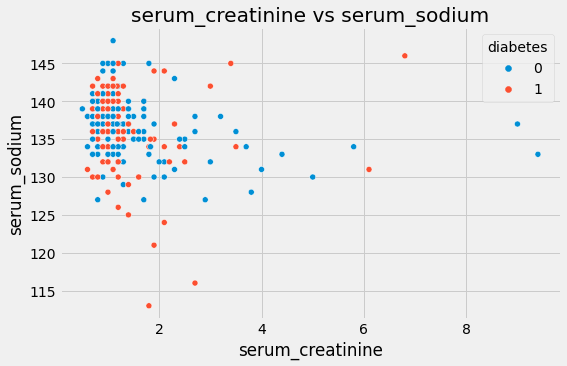

In [17]:
sns.scatterplot(data=data, x='serum_creatinine', y='serum_sodium', hue='diabetes')
plt.title('serum_creatinine vs serum_sodium')
plt.show()

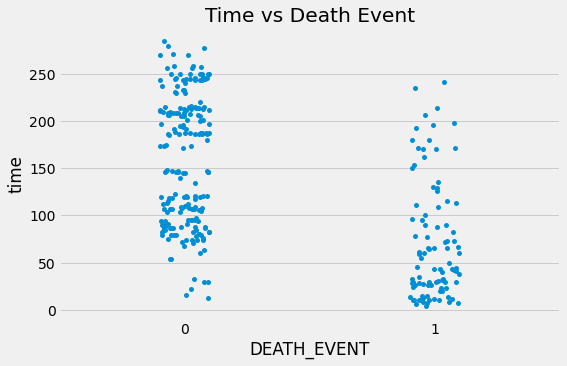

In [18]:
sns.stripplot(data=data, x="DEATH_EVENT", y="time")
plt.title('Time vs Death Event')
plt.show()

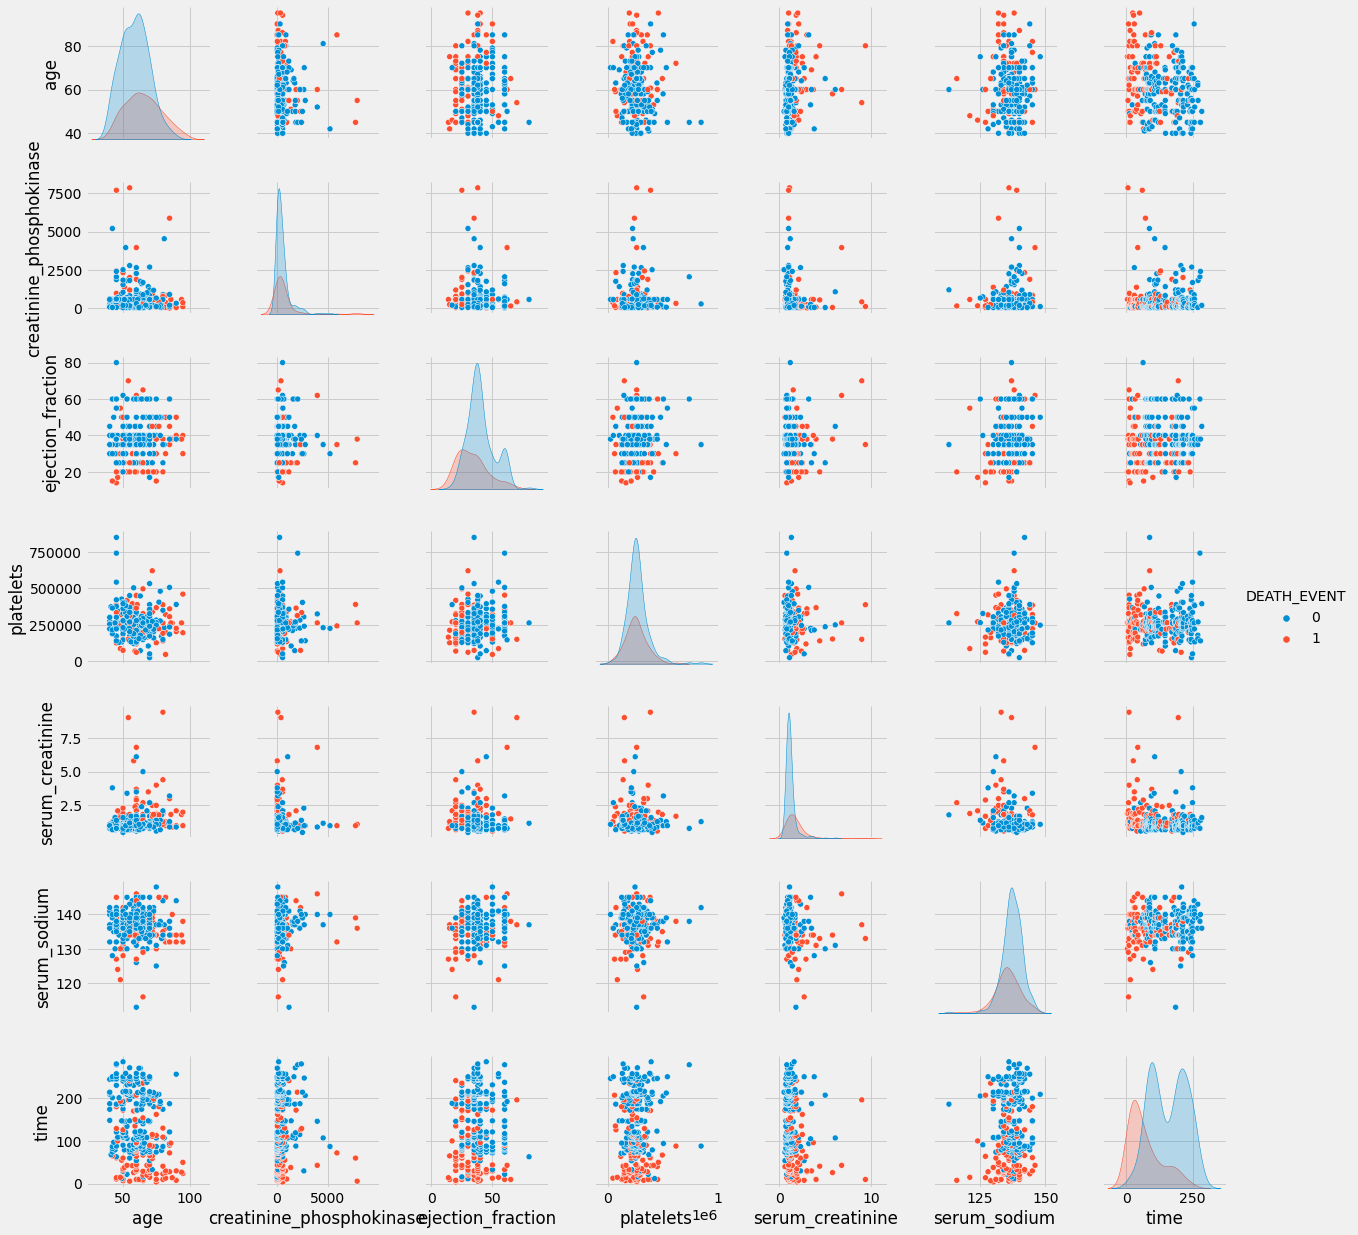

In [19]:
sns.pairplot(data=data[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','DEATH_EVENT']], hue='DEATH_EVENT')

In [21]:
from sklearn.preprocessing import StandardScaler
cols = ['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

scaler = StandardScaler()
data[cols] = scaler.fit_transform(data[cols])

In [22]:
from sklearn.metrics import roc_curve,accuracy_score,plot_confusion_matrix
from sklearn.model_selection import train_test_split

X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT'].copy()

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=13)

In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(min_samples_split=2, class_weight={0:2,1:7}, random_state=13)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree Classifier is', accuracy_score(prediction,test_y))

The accuracy of the Decision Tree Classifier is 0.84


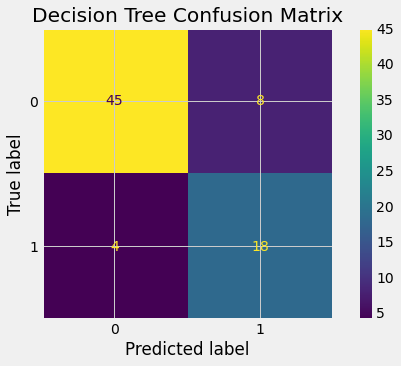

In [32]:
plot_confusion_matrix(model, test_X, test_y)
plt.title('Decision Tree Confusion Matrix')
plt.show()

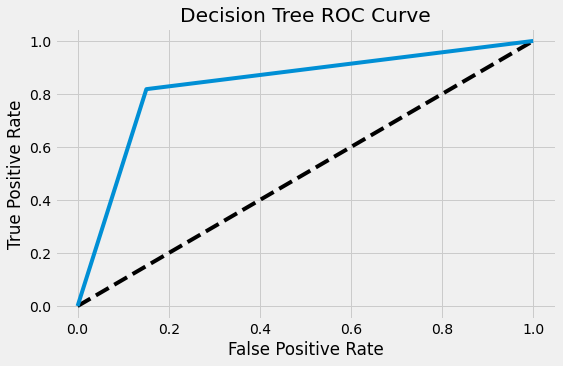

In [24]:
model = DecisionTreeClassifier(min_samples_split=2, class_weight={0:2,1:7}, random_state=13)
model.fit(train_X, train_y)
y_pred_prob = model.predict_proba(test_X)[:,1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='DT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(min_samples_split=2, class_weight={0:2,1:7}, random_state=13)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Random Forest Classifier is', accuracy_score(prediction,test_y))

The accuracy of the Random Forest Classifier is 0.8933333333333333


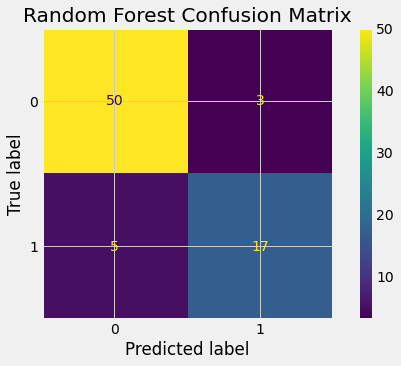

In [26]:
plot_confusion_matrix(model, test_X, test_y)
plt.title('Random Forest Confusion Matrix')
plt.show()

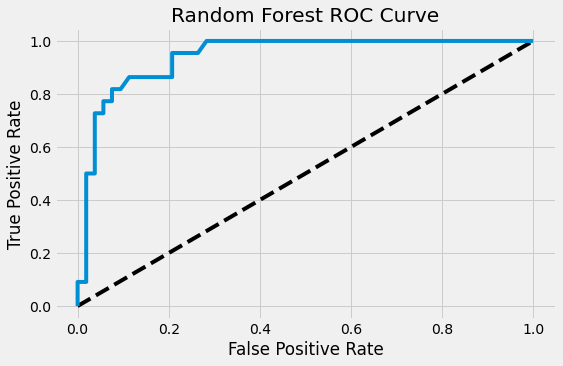

In [27]:
model = RandomForestClassifier(min_samples_split=2, class_weight={0:2,1:7}, random_state=13)
model.fit(train_X, train_y)
y_pred_prob = model.predict_proba(test_X)[:,1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()